___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

In this chapter, you will use a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. You will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

**INSTRUCTIONS**

*   Read ``weather.csv`` into a ``DataFrame`` named ``weather``.
*   Select the temperature columns (``TMIN``, ``TAVG``, ``TMAX``) and print their ``summary statistics`` using the ``.describe()`` method.
*   Create a **box plot** to visualize the temperature columns.
*   Display the plot.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

ri = pd.read_csv('police.csv', engine='python').sample(50000, random_state=101)

ri.drop(['county_name', 'county_fips', 'fine_grained_location', 'state'], axis=1, inplace=True)

ri.dropna(subset=['driver_gender'], inplace=True)

ri['is_arrested'] = ri['is_arrested'].astype({'is_arrested': 'bool'})

ri['stop_datetime'] = ri['stop_date'] + ' ' + ri['stop_time']
ri['stop_datetime'] = pd.to_datetime(ri['stop_datetime'])

ri.set_index('stop_datetime', inplace=True)

In [2]:
weather = pd.read_csv('weather.csv')

In [3]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
weather.shape

(8022, 26)

In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8022 entries, 0 to 8021
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  8022 non-null   object 
 1   DATE     8022 non-null   object 
 2   AWND     4017 non-null   float64
 3   TAVG     1217 non-null   float64
 4   TMAX     8005 non-null   float64
 5   TMIN     7996 non-null   float64
 6   WT01     1777 non-null   float64
 7   WT02     221 non-null    float64
 8   WT03     227 non-null    float64
 9   WT04     119 non-null    float64
 10  WT05     360 non-null    float64
 11  WT06     25 non-null     float64
 12  WT07     79 non-null     float64
 13  WT08     404 non-null    float64
 14  WT09     69 non-null     float64
 15  WT10     2 non-null      float64
 16  WT11     3 non-null      float64
 17  WT13     1175 non-null   float64
 18  WT14     575 non-null    float64
 19  WT15     6 non-null      float64
 20  WT16     1326 non-null   float64
 21  WT17     12 no

In [6]:
temperature = weather[['TMIN', 'TAVG', 'TMAX']]
temperature.describe()

,TMIN,TAVG,TMAX
count,7996.000000,1217.000000,8005.000000
mean,42.099425,52.493016,61.247096
std,17.386667,17.829792,18.495043
min,-10.000000,6.000000,13.000000
25%,29.000000,39.000000,46.000000
50%,42.000000,54.000000,62.000000
75%,57.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


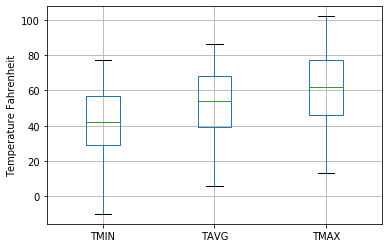

In [7]:
fig= temperature.boxplot()
fig.set_ylabel('Temperature Fahrenheit')
plt.show()

***

## Plotting the temperature difference

**INSTRUCTIONS**

*   Create a new column in the ``weather`` ``DataFrame`` named ``TDIFF`` that represents the difference between the maximum and minimum temperatures.
*   Print the summary statistics for ``TDIFF`` using the ``.describe()`` method.
*   Create a histogram with ``20 bins`` to visualize ``TDIFF``.
*   Display the plot.

In [8]:
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']

In [9]:
weather['TDIFF'].describe()

count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64

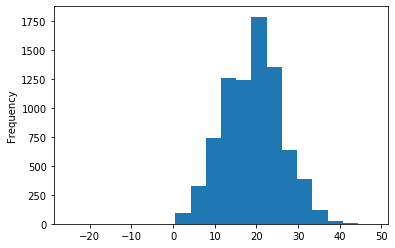

In [10]:
weather.TDIFF.plot.hist(bins=20)

In [11]:
weather['TDIFF'][weather['TDIFF'] < 0]

1201   -25.0
Name: TDIFF, dtype: float64

In [12]:
weather.iloc[1201][4:6]

TMAX    51
TMIN    76
Name: 1201, dtype: object

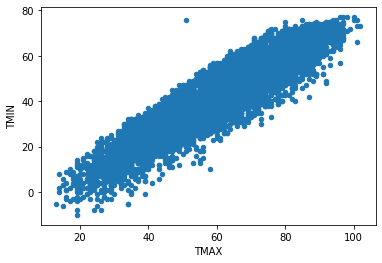

In [13]:
fig_diff_sc = weather[['TDIFF','TMIN','TMAX']].plot.scatter(x='TMAX',y='TMIN')
plt.show()

***

## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

In this exercise, you'll quantify ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

**INSTRUCTIONS**

*   Copy the columns ``WT01`` through ``WT22`` from ``weather`` to a new ``DataFrame`` named ``WT``.
*   Calculate the sum of each row in ``WT``, and store the results in a new weather column named ``bad_conditions``.
*   Replace any ``missing values`` in ``bad_conditions`` with a ``0``. (This has been done for you.)
*   Create a **histogram** to visualize ``bad_conditions``, and then display the plot.

In [14]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8022 entries, 0 to 8021
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  8022 non-null   object 
 1   DATE     8022 non-null   object 
 2   AWND     4017 non-null   float64
 3   TAVG     1217 non-null   float64
 4   TMAX     8005 non-null   float64
 5   TMIN     7996 non-null   float64
 6   WT01     1777 non-null   float64
 7   WT02     221 non-null    float64
 8   WT03     227 non-null    float64
 9   WT04     119 non-null    float64
 10  WT05     360 non-null    float64
 11  WT06     25 non-null     float64
 12  WT07     79 non-null     float64
 13  WT08     404 non-null    float64
 14  WT09     69 non-null     float64
 15  WT10     2 non-null      float64
 16  WT11     3 non-null      float64
 17  WT13     1175 non-null   float64
 18  WT14     575 non-null    float64
 19  WT15     6 non-null      float64
 20  WT16     1326 non-null   float64
 21  WT17     12 no

In [15]:
wt = weather.loc[:, 'WT01':'WT22']

In [16]:
wt = wt.fillna(0)
wt

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8019,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8020,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
weather['bad_conditions'] = [sum(wt.loc[i]) for i in range(len(wt))] # = wt.sum(axis = 'columns')
weather['bad_conditions'].value_counts().sort_index()

0.0    5738
1.0     628
2.0     368
3.0     380
4.0     476
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64

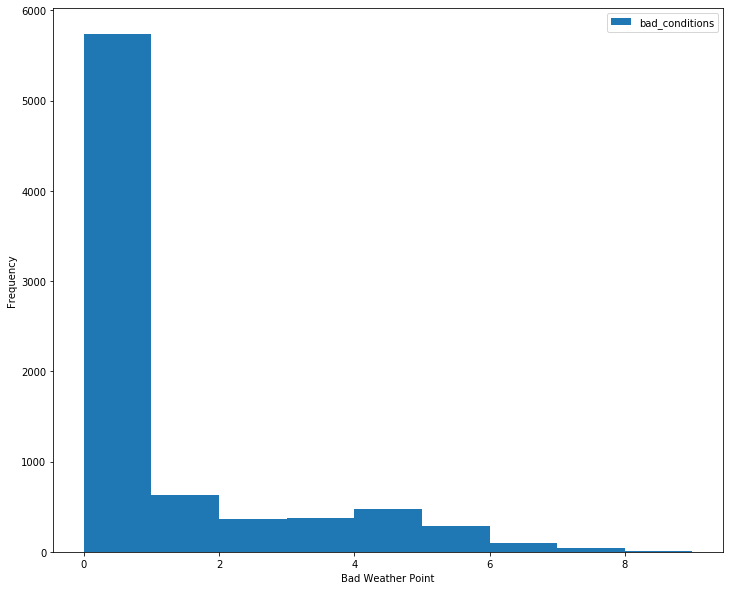

In [18]:
fig_bad = weather[['bad_conditions']].plot.hist(bins=9, figsize=(12,10))
fig_bad.set_xlabel('Bad Weather Point')
plt.show()

***

## Rating the weather conditions

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

**INSTRUCTIONS**

*   Count the **unique** values in the ``bad_conditions`` column and sort the ``index``. 
*   Create a ``dictionary`` called ``mapping`` that maps the ``bad_conditions`` integers to strings as specified above.
*   Convert the ``bad_conditions`` integers to strings using the ``mapping`` and store the results in a new column called ``rating``.
*   Count the **unique** values in ``rating`` to verify that the integers were properly converted to strings.

In [19]:
weather_rate = weather.bad_conditions.value_counts()
weather_rate

0.0    5738
1.0     628
4.0     476
3.0     380
2.0     368
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64

In [20]:
weather.sort_values(['bad_conditions'], ascending=False).head(10)

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF,bad_conditions
4010,USW00014765,2005-01-06,8.72,30.0,35.0,25.0,1.0,NaN,NaN,1.0,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,10.0,9.0
5455,USW00014765,2008-12-21,12.08,NaN,34.0,20.0,1.0,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,14.0,9.0
5525,USW00014765,2009-03-01,16.11,NaN,32.0,24.0,1.0,NaN,1.0,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,8.0,9.0
4354,USW00014765,2005-12-16,12.08,NaN,51.0,30.0,1.0,1.0,NaN,1.0,...,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,21.0,9.0
4071,USW00014765,2005-03-08,14.32,30.0,44.0,16.0,1.0,1.0,NaN,1.0,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,28.0,8.0
4016,USW00014765,2005-01-12,7.61,33.0,37.0,29.0,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,8.0,8.0
4347,USW00014765,2005-12-09,10.29,NaN,39.0,22.0,1.0,1.0,NaN,1.0,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,17.0,8.0
5493,USW00014765,2009-01-28,8.95,NaN,42.0,23.0,1.0,1.0,1.0,1.0,...,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,19.0,8.0
5818,USW00014765,2009-12-19,13.42,NaN,30.0,20.0,1.0,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,10.0,7.0
5808,USW00014765,2009-12-09,8.05,NaN,45.0,32.0,1.0,1.0,1.0,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,13.0,7.0


In [21]:
mapping = {0:"good", 1:"bad", 2:"bad", 3:"bad", 4:"bad", 5:"worse", 6:"worse", 7:"worse", 8:"worse", 9:"worse"}

In [22]:
weather['rating'] = weather['bad_conditions'].map(mapping)
weather['rating'].value_counts()

good     5738
bad      1852
worse     432
Name: rating, dtype: int64

In [23]:
weather.sort_values('bad_conditions', ascending=False).head(10)

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF,bad_conditions,rating
4010,USW00014765,2005-01-06,8.72,30.0,35.0,25.0,1.0,NaN,NaN,1.0,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,10.0,9.0,worse
5455,USW00014765,2008-12-21,12.08,NaN,34.0,20.0,1.0,1.0,1.0,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,14.0,9.0,worse
5525,USW00014765,2009-03-01,16.11,NaN,32.0,24.0,1.0,NaN,1.0,1.0,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,8.0,9.0,worse
4354,USW00014765,2005-12-16,12.08,NaN,51.0,30.0,1.0,1.0,NaN,1.0,...,1.0,1.0,1.0,NaN,NaN,1.0,NaN,21.0,9.0,worse
4071,USW00014765,2005-03-08,14.32,30.0,44.0,16.0,1.0,1.0,NaN,1.0,...,NaN,1.0,NaN,1.0,NaN,NaN,1.0,28.0,8.0,worse
4016,USW00014765,2005-01-12,7.61,33.0,37.0,29.0,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,8.0,8.0,worse
4347,USW00014765,2005-12-09,10.29,NaN,39.0,22.0,1.0,1.0,NaN,1.0,...,NaN,1.0,NaN,1.0,NaN,NaN,1.0,17.0,8.0,worse
5493,USW00014765,2009-01-28,8.95,NaN,42.0,23.0,1.0,1.0,1.0,1.0,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,19.0,8.0,worse
5818,USW00014765,2009-12-19,13.42,NaN,30.0,20.0,1.0,1.0,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,10.0,7.0,worse
5808,USW00014765,2009-12-09,8.05,NaN,45.0,32.0,1.0,1.0,1.0,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,13.0,7.0,worse


***

## Changing the data type to category

Since the ``rating`` column only has a few possible values, you'll change its data type to ``category`` in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

**INSTRUCTIONS**

*   Create a ``list`` object called ``cats`` that lists the weather ratings in a logical order: ``'good'``, ``'bad'``, ``'worse'``.
*   Change the data type of the ``rating`` column from ``object`` to ``category``. Make sure to use the ``cats list`` to define the category ordering.
*   Examine the ``head`` of the ``rating`` column to confirm that the categories are logically ordered.

In [24]:
cats = ['good', 'bad', 'worse']

In [25]:
cat_dtype = pd.api.types.CategoricalDtype(categories=cats, ordered=True)
weather['rating']=weather['rating'].astype(cat_dtype)

In [26]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8022 entries, 0 to 8021
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   STATION         8022 non-null   object  
 1   DATE            8022 non-null   object  
 2   AWND            4017 non-null   float64 
 3   TAVG            1217 non-null   float64 
 4   TMAX            8005 non-null   float64 
 5   TMIN            7996 non-null   float64 
 6   WT01            1777 non-null   float64 
 7   WT02            221 non-null    float64 
 8   WT03            227 non-null    float64 
 9   WT04            119 non-null    float64 
 10  WT05            360 non-null    float64 
 11  WT06            25 non-null     float64 
 12  WT07            79 non-null     float64 
 13  WT08            404 non-null    float64 
 14  WT09            69 non-null     float64 
 15  WT10            2 non-null      float64 
 16  WT11            3 non-null      float64 
 17  WT13          

In [27]:
weather['rating'].head()

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]

***

## Preparing the DataFrames

In this exercise, you'll prepare the **traffic stop** and **weather rating** ``DataFrames`` so that they're ready to be merged:

With the ``ri`` ``DataFrame``, you'll move the ``stop_datetime`` index to a ``column`` since the index will be lost during the merge.

With the ``weather`` ``DataFrame``, you'll select the ``DATE`` and ``rating`` columns and put them in a new ``DataFrame``.

**INSTRUCTIONS**

* Reset the ``index`` of the ``ri`` ``DataFrame``.

* Examine the ``head`` of ``ri`` to verify that ``stop_datetime`` is now a ``DataFrame`` column, 
and the ``index`` is now the default ``integer`` index.

* Create a new ``DataFrame`` named ``weather_rating`` that contains only the ``DATE`` and ``rating`` columns from the ``weather`` ``DataFrame``.

* Examine the ``head`` of ``weather_rating`` to verify that it contains the proper columns.

> Before starting your work from this part of this chapter **repeat the steps which you did in the first chapter for preparing the ``ri`` data.** Continue to this chapter based on where you were in the end of the first chapter.

In [28]:
ri.reset_index(inplace=True)

In [29]:
weather_rating = weather[['DATE', 'rating']]
weather_rating.head()

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good


***

## Merging the DataFrames

Merging the DataFrames
In this exercise, you'll ``merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` into a new ``DataFrame``, ``ri_weather``.

The ``DataFrames`` will be joined using the ``stop_date`` column from ``ri`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set ``stop_datetime`` as the index, which is the column you saved in the previous exercise.

Examine the shape of the ``ri`` ``DataFrame``.
``Merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` using a ``left join``.
Examine the ``shape`` of ``ri_weather`` to confirm that it has two more columns but the same number of rows as ``ri``.
Replace the ``index`` of ``ri_weather`` with the ``stop_datetime`` column.

In [30]:
ri_weather = ri.merge(weather_rating, how='left', left_on='stop_date', right_on='DATE')

In [31]:
ri_weather.head()

,stop_datetime,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,DATE,rating
0,2009-02-28 11:02:00,RI-2009-08019,2009-02-28,11:02,Zone K2,900,M,1952.0,57.0,W,...,NaN,False,Citation,False,0-15 Min,True,False,Zone K2,2009-02-28,good
1,2009-02-28 11:02:00,RI-2009-08019,2009-02-28,11:02,Zone K2,900,M,1952.0,57.0,W,...,NaN,False,Citation,False,0-15 Min,True,False,Zone K2,2009-02-28,bad
2,2012-05-17 13:45:00,RI-2012-27184,2012-05-17,13:45,Zone K2,900,F,1991.0,21.0,W,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K2,2012-05-17,good
3,2012-05-17 13:45:00,RI-2012-27184,2012-05-17,13:45,Zone K2,900,F,1991.0,21.0,W,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K2,2012-05-17,bad
4,2008-08-30 18:09:00,RI-2008-32661,2008-08-30,18:09,Zone K3,300,M,1967.0,41.0,L,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K3,2008-08-30,good


In [32]:
ri_weather.set_index(['stop_datetime'], inplace=True)
ri_weather.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2009-02-28 11:02:00,RI-2009-08019,2009-02-28,11:02,Zone K2,900,M,1952.0,57.0,W,White,...,NaN,False,Citation,False,0-15 Min,True,False,Zone K2,2009-02-28,good
2009-02-28 11:02:00,RI-2009-08019,2009-02-28,11:02,Zone K2,900,M,1952.0,57.0,W,White,...,NaN,False,Citation,False,0-15 Min,True,False,Zone K2,2009-02-28,bad
2012-05-17 13:45:00,RI-2012-27184,2012-05-17,13:45,Zone K2,900,F,1991.0,21.0,W,White,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K2,2012-05-17,good
2012-05-17 13:45:00,RI-2012-27184,2012-05-17,13:45,Zone K2,900,F,1991.0,21.0,W,White,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K2,2012-05-17,bad
2008-08-30 18:09:00,RI-2008-32661,2008-08-30,18:09,Zone K3,300,M,1967.0,41.0,L,Hispanic,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K3,2008-08-30,good


***

## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Find out below!

- **First**, you'll calculate the **overall arrest rate**.

- **Then**, you'll calculate the **arrest rate** for each of the **weather ratings** you previously assigned.

- **Finally**, you'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

In [34]:
ri_weather.is_arrested.mean()

0.03483188996434029

In [35]:
ri_weather.groupby('rating')['is_arrested'].mean()

rating
good     0.034512
bad      0.035080
worse    0.038885
Name: is_arrested, dtype: float64

In [37]:
ri_weather.groupby(['violation', 'rating' ])['is_arrested'].mean()

violation            rating
Equipment            good      0.056087
                     bad       0.058022
                     worse     0.083990
Moving violation     good      0.056497
                     bad       0.056274
                     worse     0.063389
Other                good      0.083682
                     bad       0.080983
                     worse     0.069364
Registration/plates  good      0.082861
                     bad       0.090698
                     worse     0.104972
Seat belt            good      0.025964
                     bad       0.018779
                     worse     0.000000
Speeding             good      0.014617
                     bad       0.014722
                     worse     0.014547
Name: is_arrested, dtype: float64

***

## Selecting From a multi-indexed Series

The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
In this exercise, you'll practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

**INSTRUCTIONS**

- Save the output of the ``.groupby()`` operation from the last exercise as a new object, ``arrest_rate``.
- Print the ``arrest_rate`` ``Series`` and examine it.
- Print the arrest rate for ``moving violations`` in bad weather.
- Print the arrest rates for ``speeding violations`` in all three weather conditions.

In [38]:
arrest_rate = ri_weather.groupby(['violation', 'rating'])['is_arrested'].mean()

In [41]:
arrest_rate

violation            rating
Equipment            good      0.056087
                     bad       0.058022
                     worse     0.083990
Moving violation     good      0.056497
                     bad       0.056274
                     worse     0.063389
Other                good      0.083682
                     bad       0.080983
                     worse     0.069364
Registration/plates  good      0.082861
                     bad       0.090698
                     worse     0.104972
Seat belt            good      0.025964
                     bad       0.018779
                     worse     0.000000
Speeding             good      0.014617
                     bad       0.014722
                     worse     0.014547
Name: is_arrested, dtype: float64

In [40]:
arrest_rate['Moving violation', 'bad', True]

0.05627394636015326

In [44]:
arrest_rate.loc[ 'Speeding']

rating
good     0.014617
bad      0.014722
worse    0.014547
Name: is_arrested, dtype: float64

***

## Reshaping the arrest rate data

In this exercise, you'll start by **reshaping** the ``arrest_rate`` ``Series`` into a ``DataFrame``. This is a useful step when working with any multi-indexed ``Series``, since it enables you to access the full range of ``DataFrame`` methods.

Then, you'll create the exact same ``DataFrame`` using a ``pivot table``. This is a great example of how pandas often gives you more than one way to reach the same result!

**INSTRUCTIONS**

- ``unstack`` the ``arrest_rate`` ``Series`` to ``reshape`` it into a ``DataFrame``.
- Create the exact same ``DataFrame`` using a ``pivot table``! Each of the three ``.pivot_table()`` parameters should be specified as one of the ``ri_weather`` columns.

In [48]:
arrest_rate_df = arrest_rate.unstack()

In [49]:
arrest_rate_df

rating,good,bad,worse
violation,,,
Equipment,0.056087,0.058022,0.083990
Moving violation,0.056497,0.056274,0.063389
Other,0.083682,0.080983,0.069364
Registration/plates,0.082861,0.090698,0.104972
Seat belt,0.025964,0.018779,0.000000
Speeding,0.014617,0.014722,0.014547


In [50]:
ri_weather.pivot_table(values='is_arrested', index='violation', columns='rating', dropna=False)

rating,good,bad,worse
violation,,,
Equipment,0.056087,0.058022,0.083990
Moving violation,0.056497,0.056274,0.063389
Other,0.083682,0.080983,0.069364
Registration/plates,0.082861,0.090698,0.104972
Seat belt,0.025964,0.018779,0.000000
Speeding,0.014617,0.014722,0.014547
